## Énoncé
En tant que Data Scientist vous venez de décrocher une mission avec une plateforme d'éducation en ligne leader sur le marché européen, vous allez bientôt signer le contrat et vous consacrer au sujet pour les deux prochaines semaines.

Ce leader de l'EdTech voit grand, ayant une forte implantation en France et en Europe, les dirigeants souhaitent également se développer sur un  territoire  qui regorge d'opportunités pour la formation en ligne, de par la taille de la population et des besoins liés aux métiers du numérique. L'entreprise souhaite démarrer son implantation  en sélectionnant les pays les plus prometteurs afin de lancer des campagnes publicitaires ciblées.

## Mission
Pour cette mission, on vous demande de déterminer la liste des pays prioritaires en vous basant sur des données récoltées par l'administration et disponibles en open-data. Votre objectif est de **fournir des résultats impactants** afin de guider Lesley en charge du développement pour la région Amérique du Nord.

Pour ce travail, votre client a identifié [une source de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip) intéressante et a déjà initié une sélection de variables, à vous de compléter l'étude.

# Pour la pré-analyse,

On va valider la qualité 

de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
dans un premier temps , on va lire les fichiers CSV avec python et analyser les relations entre eux 

In [1]:
import pandas as pd
import numpy as np
df_Country = pd.read_csv('../data/EdStatsCountry.csv',on_bad_lines='skip',engine='python', sep=',')
df_Country_Series = pd.read_csv('../data/EdStatsCountry-Series.csv',on_bad_lines='skip',engine='python', sep=',')
df_EdStatsData = pd.read_csv('../data/EdStatsData.csv', on_bad_lines='skip',engine='python',sep=',')
df_FootNote= pd.read_csv('../data/EdStatsFootNote.csv',on_bad_lines='skip',engine='python', sep=',')
df_Series = pd.read_csv('../data/EdStatsSeries.csv',on_bad_lines='skip',engine='python', sep=',')


Nous pouvons à présent charger le jeu de données, dans un dataframe que nous nommerons ici `data`. Nous affichons ensuite les 5 premières lignes.

In [2]:
df_EdStatsData.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_EdStatsData.shape

(886930, 70)

Comme vous pouvez le voir via la commande ci dessus, nous avons 98745 transactions, renseignées sur 70 variables différentes

# <a name="C2">P2C3 - Nettoyez votre jeu de données</a>

Il est à présent temps de mettre en pratique tout ce que nous avons vu sur notre jeu de données . Plusieurs **erreurs** se sont glissées dans ce jeu de données. Votre mission, si toutefois vous l'acceptez, va être de les **trouver** et de **proposer des solutions** adéquates pour les gérer.

### 1. Erreurs de type

Le premier reflexe devrait être de vérifier que les variables ont bien été importées dans le bon type :

In [4]:
df_EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

tout semble en ordre

### 2. Valeurs manquantes

On va ensuite vérifier si notre jeu de données contient des valeurs manquantes :

In [5]:
null_counts = df_EdStatsData.isnull().sum()
print(null_counts)


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


In [6]:
# on compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne
df_EdStatsData['NB_NAN'] = df_EdStatsData.isna().sum(axis=1)
# trie des lignes en fonction du nombre de valeurs manquantes
df_EdStatsData = df_EdStatsData.sort_values('NB_NAN',ascending=False)
df_EdStatsData.head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,NB_NAN
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388552,Guinea-Bissau,GNB,Africa Dataset: Percentage of female newly rec...,UIS.AFR.TRNTP.1.PU.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388538,Guinea-Bissau,GNB,Africa Dataset: Average size of single grade c...,UIS.AFR.CS.SG.1.G6.PU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388539,Guinea-Bissau,GNB,Africa Dataset: Average size of single grade c...,UIS.AFR.CS.SG.1.G7.PU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388540,Guinea-Bissau,GNB,Africa Dataset: Average size of single grade c...,UIS.AFR.CS.SG.1.PU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388549,Guinea-Bissau,GNB,Africa Dataset: Graduates from accredited pre-...,UIS.AFR.GTC.3.T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388550,Guinea-Bissau,GNB,Africa Dataset: Graduates from accredited pre-...,UIS.AFR.GTC.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388551,Guinea-Bissau,GNB,Africa Dataset: Percentage of female newly rec...,UIS.AFR.TRNTP.2.PU.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388553,Guinea-Bissau,GNB,Africa Dataset: Percentage of female newly rec...,UIS.AFR.TRNTP.3.PU.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
388519,Guinea-Bissau,GNB,Africa Dataset: Average number of pupils per m...,UIS.AFR.PBR.1.G5.PU.MATH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66


les résultats sont assez volumineux et on va faire une agregation pour avoir plus de visibilité 

In [7]:
# Regroupement par une colonne et calcul de la somme d'une autre colonne
grouped_df = df_EdStatsData.groupby(['Indicator Name','Country Name'])['NB_NAN'].sum()

# Tri de la DataFrame groupée par les valeurs agrégées par ordre décroissant
sorted_df = grouped_df.sort_values(ascending=True)

# Affichage de la DataFrame triée
sorted_df.head


<bound method NDFrame.head of Indicator Name                                                                    Country Name                                
Official entrance age to primary education (years)                                Czech Republic                                  19
Population, female                                                                Canada                                          19
Population, ages 15-64, total                                                     Malta                                           19
Population of the official age for pre-primary education, male (number)           Norway                                          19
                                                                                  Nigeria                                         19
                                                                                                                                  ..
EGRA: Oral Reading Fluency - Correct Words Re

In [8]:
# pour afficher uniquement les variables qui ont des valeurs manquantes

sorted_df[sorted_df<=40]

Indicator Name                                                           Country Name  
Official entrance age to primary education (years)                       Czech Republic    19
Population, female                                                       Canada            19
Population, ages 15-64, total                                            Malta             19
Population of the official age for pre-primary education, male (number)  Norway            19
                                                                         Nigeria           19
                                                                                           ..
Population, age 16, male                                                 Pakistan          40
Population, ages 13-17, total                                            Tanzania          40
Population, age 16, male                                                 Argentina         40
Population, ages 13-17, total                                     

Le fait de chercher les pays qui ont peu de données manquantes n 'a pas donnée de résultats pertinant .On va chercher par Pays .

In [9]:
# Regroupement par une colonne et calcul de la somme d'une autre colonne
grouped_df = df_EdStatsData.groupby('Country Name')['NB_NAN'].sum()

# Tri de la DataFrame groupée par les valeurs agrégées par ordre décroissant
sorted_df = grouped_df.sort_values(ascending=True)
sorted_df[sorted_df<=40]

# Affichage de la DataFrame triée
sorted_df.head(10)

Country Name
Malta                   207468
Cyprus                  207682
Italy                   207909
Bulgaria                208695
Hungary                 208844
Morocco                 208967
Niger                   209030
Mexico                  209118
Colombia                209407
Syrian Arab Republic    209551
Name: NB_NAN, dtype: int64

Je prends les colonnes qui ont des données non manquant

In [10]:

# Calcul de la moyenne du nombre de valeurs manquantes par colonne
mean_null_values = df_EdStatsData.isnull().mean()

# Filtrage des colonnes ayant des valeurs inférieures à la moyenne des valeurs manquantes
columns_below_mean_nulls = mean_null_values[mean_null_values < mean_null_values.mean()].index.tolist()

# Affichage des colonnes ayant des valeurs inférieures à la moyenne des valeurs manquantes
print(columns_below_mean_nulls)


['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'NB_NAN']


on va utiliser que les colonnes selectionés précedement qui sont superieurs à la moyenne de valeurs manquantes 

In [11]:
# Liste des colonnes filtrées précédemment
columns_below_mean_nulls = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'NB_NAN']


# Sélection des colonnes filtrées dans la DataFrame
filtered_df = df_EdStatsData[columns_below_mean_nulls]
# Affichage de la DataFrame avec les colonnes filtrées
print(filtered_df)
filtered_df.shape

         Country Name Country Code  \
0          Arab World          ARB   
388552  Guinea-Bissau          GNB   
388538  Guinea-Bissau          GNB   
388539  Guinea-Bissau          GNB   
388540  Guinea-Bissau          GNB   
...               ...          ...   
137289     Azerbaijan          AZE   
189398         Brazil          BRA   
189399         Brazil          BRA   
189400         Brazil          BRA   
335822        Finland          FIN   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
388552  Africa Dataset: Percentage of female newly rec...   
388538  Africa Dataset: Average size of single grade c...   
388539  Africa Dataset: Average size of single grade c...   
388540  Africa Dataset: Average size of single grade c...   
...                                                   ...   
137289  Official entrance age to primary education (ye...   
189398                Population, ages 15-64 (% of tota

(886930, 15)

grouper par pays pour savoir la qualité des données par pays

In [12]:

# Calcul de la moyenne des valeurs manquantes par ligne
mean_nulls_by_row = filtered_df.isnull().mean(axis=1)
# Filtrage des lignes où les valeurs manquantes sont inférieures à la moyenne des valeurs manquantes
filtered_rows_df = filtered_df[mean_nulls_by_row < mean_nulls_by_row.mean()]
filtered_rows_groupBY_contry_df = filtered_rows_df.groupby('Country Name')['NB_NAN'].sum()
sorted_filtered_rows_df = filtered_rows_groupBY_contry_df.sort_values(ascending=True)
# Affichage des lignes où les valeurs manquantes sont inférieures à la moyenne des valeurs manquantes
sorted_filtered_rows_df.head(20)
file='../data/EdStatsData.csv'
new_filename = f"{file.split('.')[0]}_{'filtered'}.csv"
filtered_rows_df.to_csv(new_filename, index=False)

spliter le fichier par pays

In [13]:
import sys
sys.path.append('C:/openclassroom/projet-2/src')
import EdTechVisualtionIndicator as ev
filtered_df = ev.split_data_by_indicator_save_csv('Country Name','../data/EdStatsData_filtered.csv','../data/countries')


grouper les fichiers par indicateur 

In [14]:


filtered_df = ev.split_data_by_indicator_save_csv('Indicator Code','../data/EdStatsData_filtered.csv','../data/indicatorCodes')


In [15]:
filtered_df.describe

<bound method NDFrame.describe of                 Country Name Country Code  \
0                      Haiti          HTI   
1                      Haiti          HTI   
2                      Haiti          HTI   
3       Syrian Arab Republic          SYR   
4                      Haiti          HTI   
...                      ...          ...   
238801            Azerbaijan          AZE   
238802                Brazil          BRA   
238803                Brazil          BRA   
238804                Brazil          BRA   
238805               Finland          FIN   

                                           Indicator Name     Indicator Code  \
0       UIS: Total net attendance rate, lower secondar...  UIS.NART.2.Q1.GPI   
1       UIS: Total net attendance rate, lower secondar...    UIS.NART.2.Q1.F   
2       UIS: Total net attendance rate, lower secondar...    UIS.NART.2.Q1.M   
3       TIMSS: Mean performance on the science scale f...      LO.TIMSS.SCI8   
4       UIS: Net attendan

Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [16]:
import EdTechVisualtionIndicator as ev
ev.save_statistics_by_region('../data/EdStatsData_filtered.csv','../data/EdStatsCountry.csv',"statsByregions.csv","statistiqueParRegions")

,Region,Indicator Code,Indicator Name,Moyenne,Mediane,Ecart Type
0,Latin America & Caribbean,UIS.NART.2.Q1.GPI,"UIS: Total net attendance rate, lower secondar...",1.040304e+00,1.044329e+00,1.414808e-02
1,Latin America & Caribbean,UIS.NART.2.Q1.F,"UIS: Total net attendance rate, lower secondar...",8.525530e+01,8.534581e+01,6.385958e+00
2,Latin America & Caribbean,UIS.NART.2.Q1.M,"UIS: Total net attendance rate, lower secondar...",8.202178e+01,8.234045e+01,7.428505e+00
3,Middle East & North Africa,LO.TIMSS.SCI8,TIMSS: Mean performance on the science scale f...,4.321366e+02,4.303469e+02,1.862422e+01
4,Latin America & Caribbean,UIS.NAR.1.URB.M,"UIS: Net attendance rate, primary, urban, male...",8.290387e+01,8.309825e+01,7.482053e+00
...,...,...,...,...,...,...
234619,North America,SP.POP.TOTL.MA.ZS,"Population, male (% of total)",4.948382e+01,4.949095e+01,1.915902e-02
234620,North America,SP.POP.TOTL.MA.IN,"Population, male",8.330875e+07,8.370162e+07,3.197099e+06
234621,North America,SP.POP.TOTL.FE.ZS,"Population, female (% of total)",5.051618e+01,5.050905e+01,1.915902e-02
234622,North America,SP.POP.TOTL.FE.IN,"Population, female",8.534320e+07,8.573334e+07,3.077365e+06


In [ ]:

import EdTechVisualtionIndicator as ev

datagrid_widget = ev.create_datagrid_by_indicator('../data/statistiqueParRegions/statsByregions.csv')
display(datagrid_widget)





Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
On a choisit  :

SL.UEM.TOTL.ZS : l'indicateur "Taux de chômage, total (% de la population active totale)". Cet indicateur mesure le pourcentage de la population active totale qui est sans emploi et qui cherche activement un emploi. Il représente le rapport entre le nombre de chômeurs et la population active totale, exprimé en pourcentage.

SE.ADT.1524.LT.ZS : l'indicateur "Taux de scolarisation net, niveau secondaire, femmes (% de la tranche d'âge officielle)". Cet indicateur mesure le pourcentage de femmes âgées de 15 à 24 ans qui sont inscrites dans l'enseignement secondaire, qu'il soit formel ou non.

NY.GDP.MKTP.CD : C'est l'indicateur utilisé pour mesurer la valeur totale de la production économique d'un pays sur une année donnée, exprimée en dollars américains courants.

## NY.GDP.MKTP.CD :
la valeur totale de la production économique d'un pays sur une année donnée, exprimée en dollars américains courants.

In [18]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('NY.GDP.MKTP.CD')

## SE.ADT.1524.LT.ZS  :
l'indicateur "Taux de scolarisation net, niveau secondaire, femmes (% de la tranche d'âge officielle)".

In [19]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.ADT.1524.LT.ZS')

## SL.UEM.TOTL.ZS :
l'indicateur "Taux de chômage, total (% de la population active totale)".

In [20]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SL.UEM.TOTL.ZS')

# en regardant ces trois indicateurs ,ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. : 
# Sud Afrique, Brazil  et Turkey .
pour vérifier cette constatation on utilise d'autre indicateurs : 
# SE.SEC.TCAQ.ZS : Taux de transition du secondaire à l'enseignement supérieur
# SE.SEC.ENRR : Taux de scolarisation brut au niveau secondaire 
# SE.SEC.CMPT.LO.ZS : Taux d'achèvement de l'enseignement secondaire.
# SE.PRM.CMPT.ZS Taux d'achèvement de l'enseignement primaire
les pays sont toujours sur la catégories A ou B .


In [21]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.SEC.TCAQ.ZS')

In [22]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.SEC.ENRR')

In [23]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.SEC.TCAQ.ZS')

In [24]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.SEC.CMPT.LO.ZS')

In [25]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.PRM.CMPT.ZS')

Voici quelques exemples d'indicateurs sur les dépenses publiques dans l'éducation qui permettent d'évaluer l'investissement d'un pays dans son système éducatif :

Dépenses publiques totales en éducation en pourcentage du PIB : SE.XPD.TOTL.GD.ZS
Dépenses publiques en éducation en pourcentage des dépenses gouvernementales totales : SE.XPD.TOTL.GB.ZS
Dépenses publiques en éducation par élève dans l'enseignement primaire : SE.XPD.PRIM.PC.ZS
Dépenses publiques en éducation par élève dans l'enseignement secondaire : SE.XPD.SECN.PC.ZS
Dépenses publiques en éducation par élève dans l'enseignement supérieur : SE.XPD.TERT.PC.ZS
Dépenses publiques en éducation par étudiant dans l'enseignement supérieur : SE.XPD.TERT.PC.CD
Part des dépenses publiques en éducation consacrée aux salaires des enseignants : SE.XPD.TCHR.ZS
Ces indicateurs permettent d'évaluer la proportion des ressources financières consacrées par un pays à l'éducation, ainsi que la répartition de ces dépenses entre les différents niveaux d'enseignement. Ils fournissent des informations importantes sur l'engagement d'un pays envers son système éducatif et peuvent être utilisés pour comparer les niveaux d'investissement entre différents pays.



In [26]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.XPD.TOTL.GD.ZS')

In [27]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.XPD.TERT.PC.ZS')

In [28]:
import EdTechVisualtionIndicator as ev
ev.generate_indicator_map('SE.TER.TCHR')

Voici un exemple d'indicateur lié aux caractéristiques des enseignants dans le domaine de l'éducation :

 SE.PRM.TCAQ.ZS : Pourcentage d'enseignants ayant une formation formelle en éducation Cet indicateur mesure la proportion d'enseignants qui ont reçu une formation formelle en éducation. Il peut fournir des informations sur la qualité de la main-d'œuvre enseignante d'un pays et sur sa capacité à dispenser une éducation de qualité.

D'autres indicateurs liés aux caractéristiques des enseignants peuvent inclure :

Pourcentage d'enseignants qualifiés dans l'enseignement primaire/secondaire/supérieur : SE.PRM.TCHR.QR.ZS, SE.SEC.TCHR.QR.ZS, SE.TER.TCHR.QR.ZS
Ces indicateurs mesurent la proportion d'enseignants qui répondent aux critères de qualification spécifiques établis par les autorités éducatives, tels que l'obtention d'un diplôme d'enseignement formel ou d'une certification professionnelle.

Expérience moyenne des enseignants dans l'enseignement primaire/secondaire/supérieur : SE.PRM.TCHR.FE.ZS, SE.SEC.TCHR.FE.ZS, SE.TER.TCHR.FE.ZS
Ces indicateurs donnent une indication de l'expérience moyenne des enseignants dans le système éducatif, ce qui peut être un facteur important pour évaluer leur niveau de compétence et leur expertise.

Pourcentage d'enseignants formés en TIC (Technologies de l'Information et de la Communication) : SE.PRM.TCHR.TC.ZS, SE.SEC.TCHR.TC.ZS, SE.TER.TCHR.TC.ZS : Ces indicateurs mesurent la proportion d'enseignants qui ont reçu une formation spécifique en matière d'utilisation des technologies de l'information et de la communication dans l'enseignement. Cela peut refléter leur capacité à intégrer les outils numériques dans les pratiques pédagogiques.

Ces indicateurs sur les caractéristiques des enseignants peuvent fournir des informations essentielles pour évaluer la qualité et la compétence du personnel enseignant, ce qui peut influencer les décisions concernant l'ouverture de nouvelles écoles ou de programmes éducatifs dans un pays donné.


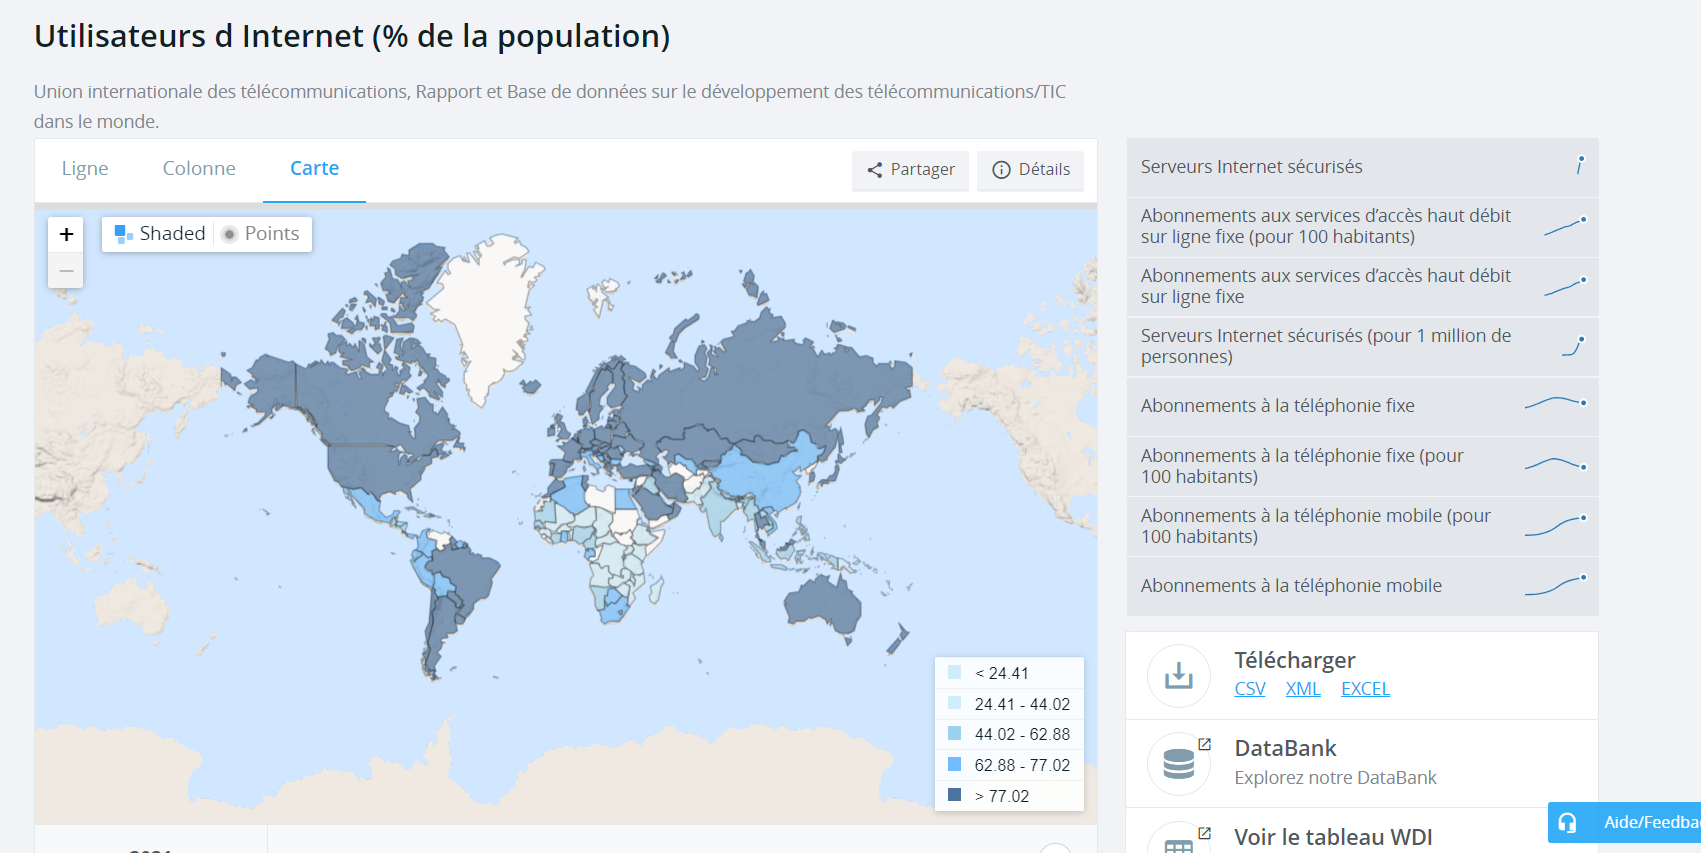